In [9]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.model_selection import train_test_split



1.读取数据集

In [10]:
def Iris_label(s):
    it={b'Iris-setosa':0, b'Iris-versicolor':1, b'Iris-virginica':2 }#Iris数据集共有三种类别的样本
    return it[s]

In [11]:
path='/Users/liwen/Downloads/iris.data'#Iris数据集是sklearn库中的一个数据集，主要用于多分类任务
data=np.loadtxt(path, dtype=float, delimiter=',', converters={4:Iris_label} )
#converters={4:Iris_label}中“4”指的是第5列：将第5列的str转化为label(number)

2.划分训练样本与测试样本

In [12]:
x,y=np.split(data,indices_or_sections=(4,),axis=1) #x为数据，y为标签
x=x[:,0:2] #为便于后边画图显示，只选取前两维度。若不用画图，可选取前四列x[:,0:4]
train_data,test_data,train_label,test_label =sklearn.model_selection.train_test_split(x,y, random_state=1, train_size=0.75,test_size=0.25)
#训练集和测试集各自所占的比例大小对模型最终的测试结果有着重要的影响；
#因此，在实验报告中我设计了几组不同数据集划分比例的实验，得出每个实验的测试结果，选择结果趋于稳定的一组。

3.SVM模型的构建和训练

In [14]:
classifier=svm.SVC(C=5,kernel='rbf',gamma=10,decision_function_shape='ovr') 
# SVC是支持向量机中做二分类的，我选择核函数是rbf高斯核函数，拆分策略是ovr一对其余策略
# 在svm.SVC（）函数中有两个可变参数C和gamma，C的值越大分类效果越明显，但太大会造成过拟合；
# gamma则对应的是高斯核函数的sigma参数，对SVM模型的泛化性能也有着非常重要的影响；
# 因此，在实验报告中我设计了几组gamma不同取值的实验，得出每个实验的测试结果，选择最合适的gamma取值。
classifier.fit(train_data,train_label.ravel()) 
#classfier.fit()用于根据给定的训练数据进行拟合SVM分类器
# ravel函数在降维时默认是行序优先


SVC(C=5, gamma=10)

4.计算分类准确率和查看模型决策函数

In [15]:
print("训练集：",classifier.score(train_data,train_label))
print("测试集：",classifier.score(test_data,test_label))

训练集： 0.8928571428571429
测试集： 0.7631578947368421


In [16]:
print('train_decision_function:',classifier.decision_function(train_data))#返回的是样本到各类超平面的距离
print('predict_result:',classifier.predict(train_data))#选择间隔最大的类别

train_decision_function: [[-0.22198337  1.14951817  2.18043857]
 [-0.1985337   0.88493616  2.22222112]
 [-0.22739314  1.14362165  2.19382696]
 [ 2.22408975 -0.17649873  0.83974555]
 [-0.22220916  1.16162401  2.17139385]
 [-0.22211119  0.99225835  2.22298665]
 [-0.22405575  2.19215953  1.13599894]
 [-0.17208716  0.83910782  2.22223182]
 [ 2.22219964  0.83822282 -0.17123714]
 [ 2.22224107 -0.17495209  0.84248626]
 [ 2.22262492 -0.1845593   0.85495035]
 [-0.19003485  2.22222444  0.86580089]
 [ 2.22345691 -0.17461883  0.83906524]
 [ 2.22222442  0.8609083  -0.1873895 ]
 [-0.17203177  0.8391101   2.22220458]
 [-0.22650172  1.14505454  2.19147432]
 [-0.18556511  0.81635916  2.23761864]
 [-0.22254329  1.01692143  2.22053838]
 [-0.22387524  1.13966255  2.18991305]
 [-0.20759887  2.22223953  0.91369412]
 [-0.17513583  0.83926172  2.22362552]
 [-0.21806794  2.23236624  0.90315237]
 [ 2.22352895 -0.17590714  0.84043099]
 [-0.22092568  1.15087763  2.17745863]
 [-0.22208065  0.98212992  2.22414501]


5.绘制图像

In [17]:
#确定坐标轴范围
x1_min, x1_max=x[:,0].min(), x[:,0].max() #第0维特征的范围
x2_min, x2_max=x[:,1].min(), x[:,1].max() #第1维特征的范围
x1,x2=np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j ] #生成网络采样点
grid_test=np.stack((x1.flat,x2.flat) ,axis=1) #测试点
#指定默认字体
matplotlib.rcParams['font.sans-serif']=['SimHei']
#设置颜色
cm_light=matplotlib.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark=matplotlib.colors.ListedColormap(['g','r','b'] )
 
grid_hat = classifier.predict(grid_test)       # 预测分类值
grid_hat = grid_hat.reshape(x1.shape)  # 使之与输入的形状相同

/var/folders/w2/01j170354d543dd8zrk0rwhc0000gn/T/ipykernel_6190/4178683968.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示


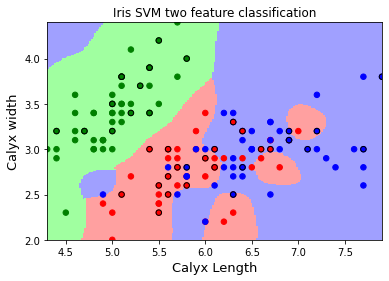

In [22]:
plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)     # 预测值的显示
plt.scatter(x[:, 0], x[:, 1], c=y[:,0], s=30,cmap=cm_dark)  # 样本
plt.scatter(test_data[:,0],test_data[:,1], c=test_label[:,0],s=30,edgecolors='k', zorder=2,cmap=cm_dark) #圈中测试集样本点
plt.xlabel('Calyx Length', fontsize=13)
plt.ylabel('Calyx width', fontsize=13)
plt.title("Iris SVM two feature classification")
plt.show()

